In [1]:
from openpharmacophore import PLComplex
import openpharmacophore.data as data

# Protein-ligand complex preparation

We want to prepare the protein ligand complex of the pdb 1M7W to be ready for pharmacophore extraction. This complex contains
lauric acid (id DAO, C12H24O2) as its ligand.

In [2]:
pl = PLComplex(data.pdb["1m7w_A_chain.pdb"])
pl.ligand_ids

['DAO:B']

First we need to extract the ligand, so we can fix its bond orders and add hydrogens to it.

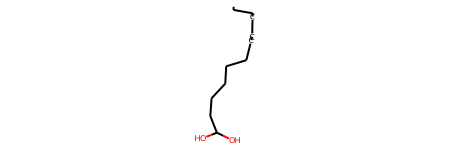

In [3]:
pl.set_ligand(pl.ligand_ids[0])    
pl.ligand_to_mol()
pl.ligand

After fixing ligand, it must have a double bond and hydrogens

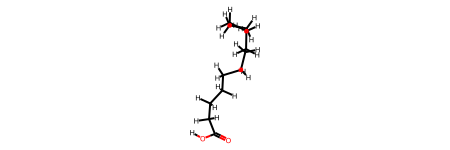

In [4]:
pl.fix_ligand(smiles="CCCCCCCCCCCC(=O)O")
pl.ligand

- We remove the unfixed ligand from the complex.
- We add hydrogens to the receptor
- Finally we concatenate the fixed ligand with the receptor

In [5]:
pl.remove_ligand()
pl.add_hydrogens()
pl.add_fixed_ligand()

In [6]:
pl.show()

NGLWidget()

# Prepare protein-ligand complex using shortcut
We prepare the protein ligand complex using the method prepare of the PLComplex class. In this case we want to add hydrogens to the complex.

In [7]:
pl_complex = PLComplex(data.pdb["test_with_lig.pdb"])
pl_complex.prepare(
    "EST:B", smiles="C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O",
    add_hydrogens=True)
pl_complex.has_hydrogens()

True

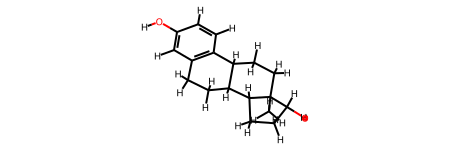

In [8]:
pl_complex.ligand

In [9]:
view = pl_complex.show()
view.representations = [
    {
        "type": "ball+stick",
        "params": {
            "sele": "all"
        }
    }
]
view

NGLWidget()

# Prepare protein-ligand complex without adding hydrogens
We prepare the protein ligand complex using the method prepare of the PLComplex class. In this case we do not want to add hydrogens to the complex.

In [10]:
pl_complex = PLComplex(data.pdb["test_with_lig.pdb"])
pl_complex.prepare(
    "EST:B", smiles="C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O",
    add_hydrogens=False)
pl_complex.has_hydrogens()

False

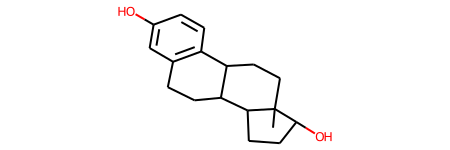

In [11]:
pl_complex.ligand

In [12]:
view = pl_complex.show()
view.representations = [
    {
        "type": "ball+stick",
        "params": {
            "sele": "all"
        }
    }
]
view

NGLWidget()